This notebook is the first analysis of the cluster NGC 1027 that I have made just to use the parameters obtained to filter the data. Each step of the analysis is documented here.

In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from cluster_tools import corr_plx, quality_filter, movprop_filter, quality2_filter

In [2]:
data = ascii.read("ngc1027c")
data

RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,e_RV,ELAT,RAJ2000,DEJ2000
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
40.752872,60.619717,464811909213194880,0.1134,0.1531,0.0203,0.2078,0.574,-0.121,0.2,-0.561,0.219,95,0.0,1.2934,1.04,18.937899,20.169657,17.902548,2.267109,0.0,0.0,42.228107,40.752872,60.61972
40.75481,60.622272,464811913515390080,0.0533,0.0723,0.4579,0.0959,1.179,-1.13,0.092,-0.337,0.102,31,1.288,0.0,0.995,17.785736,19.059893,16.697773,2.36212,0.0,0.0,42.230053,40.75482,60.622272
41.2338,60.6531,464815177690629760,0.0379,0.0474,1.9898,0.0672,17.653,16.934,0.064,-4.987,0.063,31,1.327,0.0,1.007,17.101713,18.172352,16.090834,2.081518,0.0,0.0,42.163055,41.233646,60.653122
41.24508,60.656677,464815207748179712,0.0838,0.1046,0.127,0.1474,1.565,-1.268,0.139,0.918,0.139,31,1.329,0.0,1.009,18.457813,19.480236,17.487959,1.992277,0.0,0.0,42.164097,41.24509,60.65667
41.249058,60.66426,464815207748196224,0.118,0.1545,0.3512,0.2202,0.984,-0.794,0.196,0.58,0.196,31,1.312,0.0,1.026,18.878328,20.02486,17.843283,2.181578,0.0,0.0,42.17025,41.249065,60.664257
41.258434,60.656403,464815207748758912,0.3112,0.3889,-0.1416,0.5648,3.407,-0.957,0.612,-3.269,0.573,95,0.0,1.2765,1.025,20.201271,21.21183,19.135456,2.076374,0.0,0.0,42.16121,41.258442,60.656418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.764,62.473488,467324331948558080,1.1389,1.6141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,20.991467,21.364424,20.02413,1.340294,0.0,0.0,43.72309,41.764,62.473488
41.742718,62.480606,467324400660796800,1.0698,1.1107,1.3078,1.6997,1.827,1.472,1.888,1.082,1.494,95,0.0,1.4826,1.042,20.858608,21.513405,20.057281,1.456123,0.0,0.0,43.733624,41.742702,62.480602


We will apply a filter in proper motion, limiting our data in a box with +1 and -1 around the value of the proper motion of the cluster of SIMBAD.

In [3]:
pmra_clu = -1.753
pmde_clu = 2.090
L_size = 2


In [4]:
data_mov = movprop_filter(data,pmra_clu,pmde_clu,L_size,"vizier")
len(data_mov)

58727

Applying quality filter in ruwe.

In [5]:
data_qual = quality_filter(data_mov,"vizier")
len(data_qual)

57377

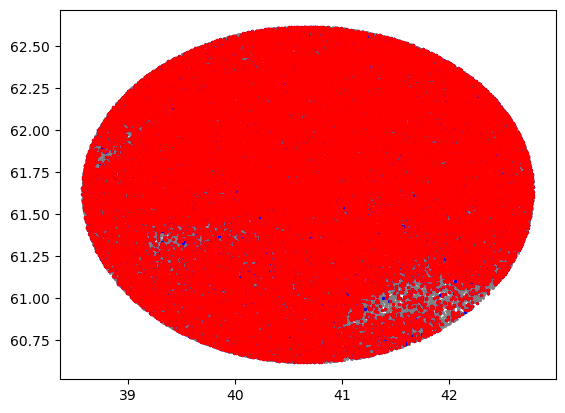

In [6]:
fig, ax = plt.subplots()
ax.scatter(data["RAJ2000"], data["DEJ2000"], color='gray', s=1)
ax.scatter(data_mov["RAJ2000"], data_mov["DEJ2000"],color = 'blue', s=2)
ax.scatter(data_qual["RAJ2000"], data_qual["DEJ2000"],color = 'red', s=2)
#ax.scatter(data_clu1["RAJ2000"], data_clu1["DEJ2000"],color = 'red', s=18)

Text(0.5, 0, 'pmra')

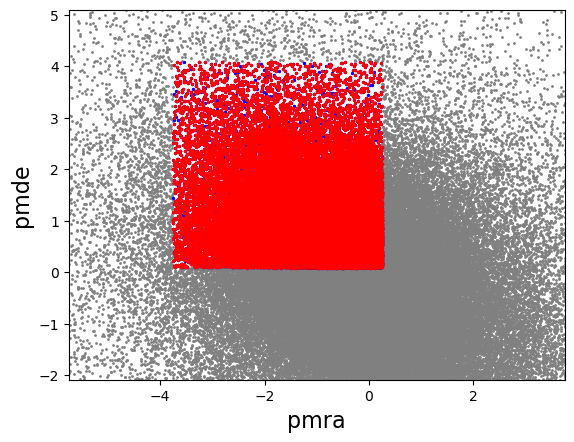

In [7]:
fig, ax = plt.subplots()
ax.scatter(data["pmRA"], data["pmDE"], color='gray', s=1)
ax.scatter(data_mov["pmRA"], data_mov["pmDE"],color = 'blue', s=2)
ax.scatter(data_qual["pmRA"], data_qual["pmDE"],color = 'red', s=2)
ax.set_xlim(-5.75,3.75)
ax.set_ylim(-2.09,5.09)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)
#ax.scatter(data_clu1["RAJ2000"], data_clu1["DEJ2000"],color = 'red', s=18)

Correcting and limiting the parallax, around the value of simbad.

In [17]:
#data_plx = corr_plx(data_qual,"vizier")

In [7]:
#ll, = np.where((data_plx["Plx_corr"] < 1.0)&(data_plx["Plx_corr"] > 0.7))
ll, = np.where((data_qual["Plx"] < 1.0)&(data_qual["Plx"] > 0.7))

In [8]:
#data_plx = data_plx[ll]
data_plx = data_qual[ll]
len(data_plx )

4533

Applying the correction of the Paralaxes according to [Lindegren 2021](https://www.aanda.org/articles/aa/full_html/2021/05/aa39653-20/aa39653-20.html) .

Text(0.5, 0, 'pmra (mas/yr)')

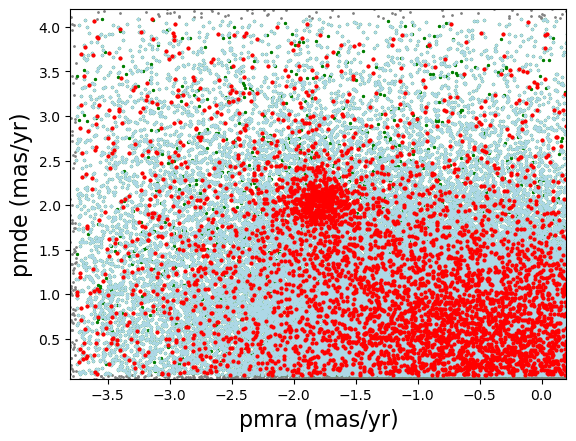

In [31]:
fig, ax = plt.subplots()
ax.scatter(data["pmRA"], data["pmDE"], color='gray', s=1)
ax.scatter(data_mov["pmRA"], data_mov["pmDE"],color = 'green', s=2)
ax.scatter(data_qual["pmRA"], data_qual["pmDE"],color = 'lightblue', s=2)
ax.scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'red', s=4)
ax.set_xlim(-3.8,0.2)
ax.set_ylim(0.05,4.2)
ax.set_ylabel("pmde (mas/yr)",fontsize=16)
ax.set_xlabel("pmra (mas/yr)",fontsize=16)
#ax.scatter(data_clu1["RAJ2000"], data_clu1["DEJ2000"],color = 'red', s=18)

Text(0.5, 0, 'RA (dec)')

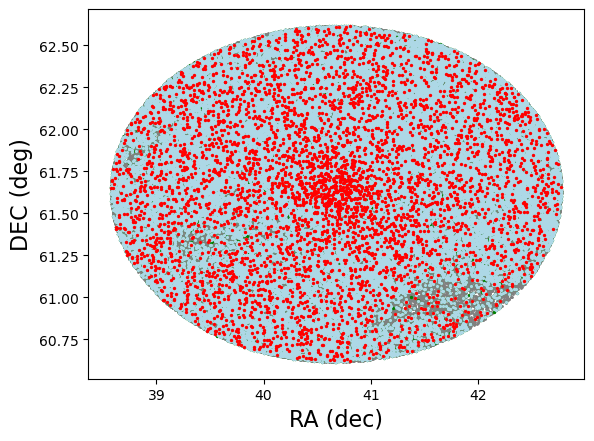

In [42]:
fig, ax = plt.subplots()
ax.scatter(data["RAJ2000"], data["DEJ2000"], color='gray', s=1)
ax.scatter(data_mov["RAJ2000"], data_mov["DEJ2000"],color = 'green', s=2)
ax.scatter(data_qual["RAJ2000"], data_qual["DEJ2000"],color = 'lightblue', s=2)
ax.scatter(data_plx["RAJ2000"], data_plx["DEJ2000"],color = 'red', s=2)
#ax.set_xlim(38.,42.)
#ax.set_ylim(59.,63.)
ax.set_ylabel("DEC (deg)",fontsize=16)
ax.set_xlabel("RA (dec)",fontsize=16)

/home/usuario/yes/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/usuario/yes/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


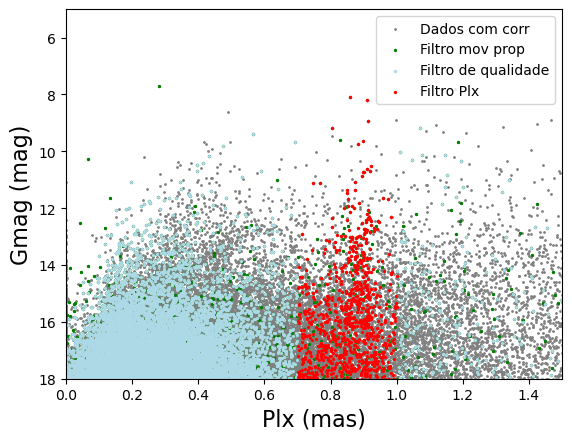

In [52]:
fig, ax = plt.subplots()
ax.scatter(data["Plx"],data["Gmag"], color='gray', s=1, label='Dados com corr')
ax.scatter(data_mov["Plx"],data_mov["Gmag"],color = 'green', s=2, label='Filtro mov prop')
ax.scatter(data_qual["Plx"],data_qual["Gmag"],color = 'lightblue', s=2, label='Filtro de qualidade')
ax.scatter(data_plx["Plx"],data_plx["Gmag"],color = 'red', s=2, label='Filtro Plx')
ax.set_xlim(0.,1.5)
ax.set_ylim(18.,5.)
ax.set_ylabel("Gmag (mag)",fontsize=16)
ax.set_xlabel("Plx (mas)",fontsize=16)
plt.legend()

Now we make a more restrict selection of the cluster's members by enclousuring it in a circle with specific radius and centered at the values of proper motion of the cluster.

In [55]:
rad1 = 1.
th  = np.linspace(0., 2*np.pi, 100)
x1_c = pmra_clu + rad1*np.cos(th)
y1_c = pmde_clu + rad1*np.sin(th)

rad2 = 0.8
x2_c = pmra_clu + rad2*np.cos(th)
y2_c = pmde_clu + rad2*np.sin(th)

rad3 = 0.6
x3_c = pmra_clu + rad3*np.cos(th)
y3_c = pmde_clu + rad3*np.sin(th)

rad4 = 0.5
x4_c = pmra_clu + rad4*np.cos(th)
y4_c = pmde_clu + rad4*np.sin(th)

Text(0.5, 0, 'pmRA')

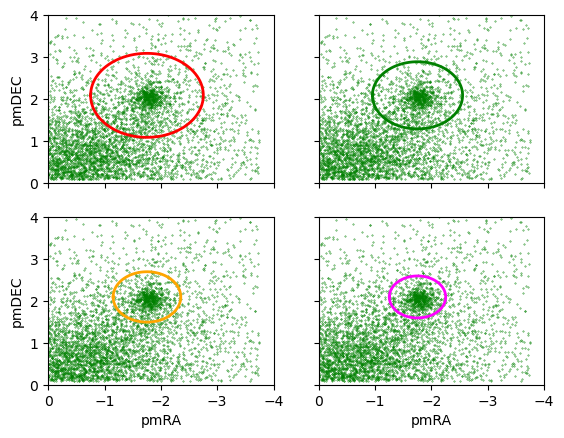

In [56]:
fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
ax[0,0].scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'green', s=0.1)
ax[0,0].plot(x1_c, y1_c,color='r', linewidth=2)
ax[0,0].set_ylabel("pmDEC")
ax[0,0].set_ylim(0,4)
ax[0,0].set_xlim(0,-4)

ax[0,1].scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'green', s=0.1)
ax[0,1].plot(x2_c, y2_c,color='g', linewidth=2)

ax[1,0].scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'green', s=0.1)
ax[1,0].plot(x3_c, y3_c,color='orange', linewidth=2)
ax[1,0].set_ylabel("pmDEC")
ax[1,0].set_xlabel("pmRA")

ax[1,1].scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'green', s=0.1)
ax[1,1].plot(x4_c, y4_c,color='magenta', linewidth=2)
ax[1,1].set_xlabel("pmRA")


Text(0.5, 0, 'pmra (mas/yr)')

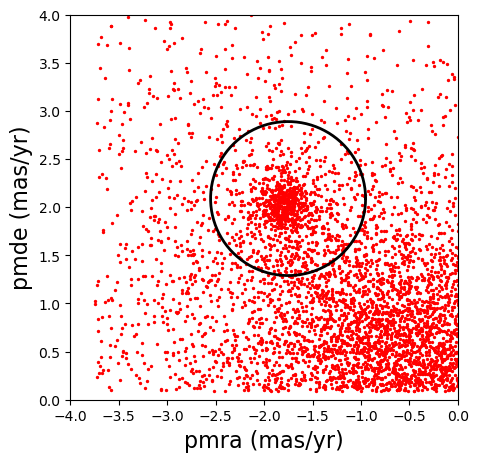

In [75]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'red', s=2.)
ax.plot(x2_c, y2_c,color='k', linewidth=2)
ax.set_xlim(-4.,0.)
ax.set_ylim(0.,4.)
ax.set_ylabel("pmde (mas/yr)",fontsize=16)
ax.set_xlabel("pmra (mas/yr)",fontsize=16)
#ax.scatter(data_clu1["RAJ2000"], data_clu1["DEJ2000"],color = 'red', s=18)

We can select the subpopulations that are in each circle and examine its other quantities. 

In [57]:
#Dividing the subpopulations
ii, = np.where(np.sqrt((data_plx["pmRA"] - pmra_clu)**2 + (data_plx["pmDE"] - pmde_clu)**2) < rad1)
jj, = np.where(np.sqrt((data_plx["pmRA"] - pmra_clu)**2 + (data_plx["pmDE"] - pmde_clu)**2) < rad2)
hh, = np.where(np.sqrt((data_plx["pmRA"] - pmra_clu)**2 + (data_plx["pmDE"] - pmde_clu)**2) < rad3)
nn, = np.where(np.sqrt((data_plx["pmRA"] - pmra_clu)**2 + (data_plx["pmDE"] - pmde_clu)**2) < rad4)

pop_rad1 = data_plx[ii]
pop_rad2 = data_plx[jj]
pop_rad3 = data_plx[hh]
pop_rad4 = data_plx[nn]

Text(0.5, 0, 'pmRA')

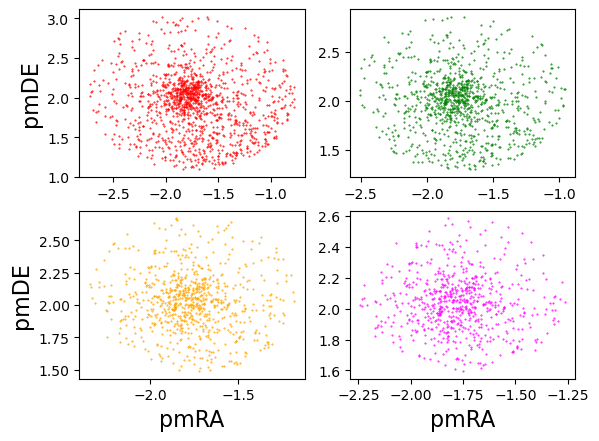

In [14]:
#fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(pop_rad1["pmRA"], pop_rad1["pmDE"],color = 'r', s=0.2)
#ax[0,0].plot(x1_c, y1_c,color='r', linewidth=2)
ax[0,0].set_ylabel("pmDE",fontsize='16')

ax[0,1].scatter(pop_rad2["pmRA"], pop_rad2["pmDE"],color = 'g', s=0.2)
#ax[0,1].plot(x2_c, y2_c,color='g', linewidth=2)

ax[1,0].scatter(pop_rad3["pmRA"], pop_rad3["pmDE"],color = 'orange', s=0.2)
#ax[1,0].plot(x3_c, y3_c,color='orange', linewidth=2)
ax[1,0].set_ylabel("pmDE",fontsize='16')
ax[1,0].set_xlabel("pmRA",fontsize='16')

ax[1,1].scatter(pop_rad4["pmRA"], pop_rad4["pmDE"],color = 'magenta', s=0.2)
#ax[1,1].plot(x4_c, y4_c,color='magenta', linewidth=2)
ax[1,1].set_xlabel("pmRA",fontsize='16')


Text(0.5, 0, 'RA')

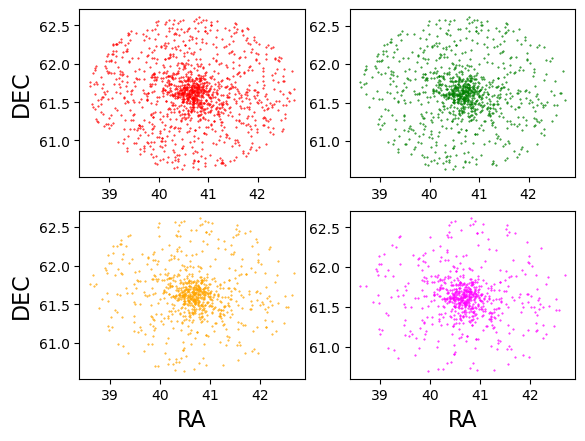

In [15]:
#fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(pop_rad1["RAJ2000"], pop_rad1["DEJ2000"],color = 'r', s=0.2)
#ax[0,0].plot(x1_c, y1_c,color='r', linewidth=2)
ax[0,0].set_ylabel("DEC",fontsize='16')

ax[0,1].scatter(pop_rad2["RAJ2000"], pop_rad2["DEJ2000"],color = 'g', s=0.2)
#ax[0,1].plot(x2_c, y2_c,color='g', linewidth=2)

ax[1,0].scatter(pop_rad3["RAJ2000"], pop_rad3["DEJ2000"],color = 'orange', s=0.2)
#ax[1,0].plot(x3_c, y3_c,color='orange', linewidth=2)
ax[1,0].set_ylabel("DEC",fontsize='16')
ax[1,0].set_xlabel("RA",fontsize='16')

ax[1,1].scatter(pop_rad4["RAJ2000"], pop_rad4["DEJ2000"],color = 'magenta', s=0.2)
#ax[1,1].plot(x4_c, y4_c,color='magenta', linewidth=2)
ax[1,1].set_xlabel("RA",fontsize='16')


In [59]:
len(pop_rad2)

995

In [58]:
bprp1 = pop_rad1["BP-RP"] 
bprp2 = pop_rad2["BP-RP"] 
bprp3 = pop_rad3["BP-RP"]
bprp4 = pop_rad4["BP-RP"]

Text(0.5, 0, 'Bp - Rp')

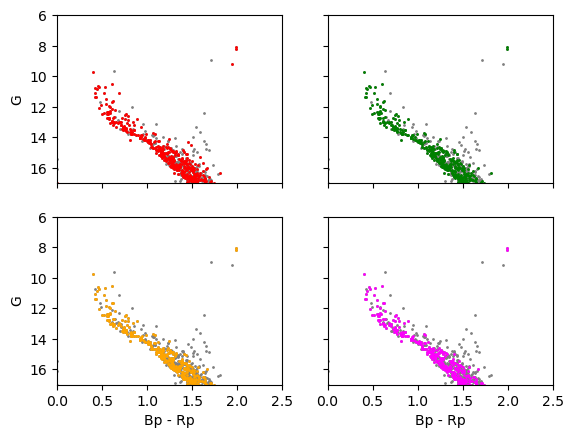

In [18]:
fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
#fig, ax = plt.subplots(2,2)
ax[0,0].scatter(data_plx["BP-RP"], data_plx["Gmag"], color = 'grey', s=1)
ax[0,0].scatter(bprp1,pop_rad1["Gmag"],color = 'r', s=1)
#ax[0,0].plot(x1_c, y1_c,color='r', linewidth=2)
ax[0,0].set_ylabel("G")
ax[0,0].set_ylim(17,6)
ax[0,0].set_xlim(0,2.5)

ax[0,1].scatter(data_plx["BP-RP"], data_plx["Gmag"], color = 'grey', s=1)
ax[0,1].scatter(bprp2,pop_rad2["Gmag"],color = 'g', s=1)
#ax[0,1].plot(x2_c, y2_c,color='g', linewidth=2)

ax[1,0].scatter(data_plx["BP-RP"], data_plx["Gmag"], color = 'grey', s=1)
ax[1,0].scatter(bprp3,pop_rad3["Gmag"],color = 'orange', s=1)
#ax[1,0].plot(x3_c, y3_c,color='orange', linewidth=2)
ax[1,0].set_ylabel("G")
ax[1,0].set_xlabel("Bp - Rp")

ax[1,1].scatter(data_plx["BP-RP"], data_plx["Gmag"], color = 'grey', s=1)
ax[1,1].scatter(bprp4,pop_rad4["Gmag"],color = 'magenta', s=1)
#ax[1,1].plot(x4_c, y4_c,color='magenta', linewidth=2)
ax[1,1].set_xlabel("Bp - Rp")


Text(0.5, 0, 'Plx')

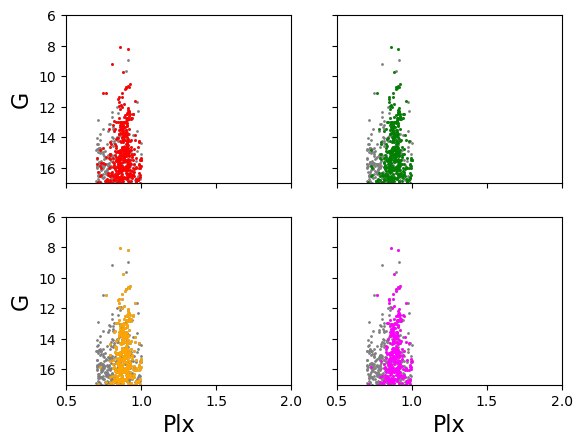

In [19]:
fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
#fig, ax = plt.subplots(2,2)
ax[0,0].scatter(data_plx["Plx"], data_plx["Gmag"], color = 'grey', s=1)
ax[0,0].scatter(pop_rad1["Plx"],pop_rad1["Gmag"],color = 'r', s=1)
#ax[0,0].plot(x1_c, y1_c,color='r', linewidth=2)
ax[0,0].set_ylabel("G",fontsize=16)
ax[0,0].set_ylim(17,6)
ax[0,0].set_xlim(0.5,2)

ax[0,1].scatter(data_plx["Plx"], data_plx["Gmag"], color = 'grey', s=1)
ax[0,1].scatter(pop_rad2["Plx"],pop_rad2["Gmag"],color = 'g', s=1)
#ax[0,1].plot(x2_c, y2_c,color='g', linewidth=2)

ax[1,0].scatter(data_plx["Plx"], data_plx["Gmag"], color = 'grey', s=1)
ax[1,0].scatter(pop_rad3["Plx"],pop_rad3["Gmag"],color = 'orange', s=1)
#ax[1,0].plot(x3_c, y3_c,color='orange', linewidth=2)
ax[1,0].set_ylabel("G",fontsize=16)
ax[1,0].set_xlabel("Plx",fontsize=16)

ax[1,1].scatter(data_plx["Plx"], data_plx["Gmag"], color = 'grey', s=1)
ax[1,1].scatter(pop_rad4["Plx"],pop_rad4["Gmag"],color = 'magenta', s=1)
#ax[1,1].plot(x4_c, y4_c,color='magenta', linewidth=2)
ax[1,1].set_xlabel("Plx",fontsize=16)


## Histograms

In [76]:
def gaussian(x, a1, mu1, sigma1):
    return (a1 * np.exp(-(x - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi)))

### Positions (RA,DEC)

We are making the analysis in the population 2, in the radius $rad2 = 0.8$.

In [154]:
population = pop_rad2

In [155]:
hist_ra, bin_edges_ra = np.histogram(population["RAJ2000"], bins=30)
hist_de, bin_edges_de = np.histogram(population["DEJ2000"], bins=30)

# take the centers of the bins 
bin_centers_ra = (bin_edges_ra[:-1] + bin_edges_ra[1:]) / 2
bin_centers_de = (bin_edges_de[:-1] + bin_edges_de[1:]) / 2

# parameters
initial_guess_ra = [1, np.mean(population["RAJ2000"]), np.std(population["RAJ2000"])]
initial_guess_de = [1, np.mean(population["DEJ2000"]), np.std(population["DEJ2000"])]

# adjust the gaussians
params_ra, _ = curve_fit(gaussian, bin_centers_ra, hist_ra, p0=initial_guess_ra)
params_de, _ = curve_fit(gaussian, bin_centers_de, hist_de, p0=initial_guess_de)

In [156]:
params_ra

array([29.36903263, 40.66254591,  0.1258879 ])

In [157]:
params_de

array([6.48511601e+00, 6.16208964e+01, 2.84717918e-02])

In [158]:
a1,mu1,sigma1= params_ra[0], params_ra[1], params_ra[2]
a2,mu2,sigma2= params_de[0], params_de[1], params_de[2]

x_ra = np.linspace(min(population["RAJ2000"]), max(population["RAJ2000"]), 100)
x_de = np.linspace(min(population["DEJ2000"]), max(population["DEJ2000"]), 100)

gaus1=a1 * np.exp(-(x_ra - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi))
gaus2=a2 * np.exp(-(x_de - mu2)**2 / (2 * sigma2*2)) / (sigma2 * np.sqrt(2 * np.pi))

Text(40.9, 62.41, '$\\mu_{DEC} = 61.62$, $\\sigma_{DEC}= 0.16$')

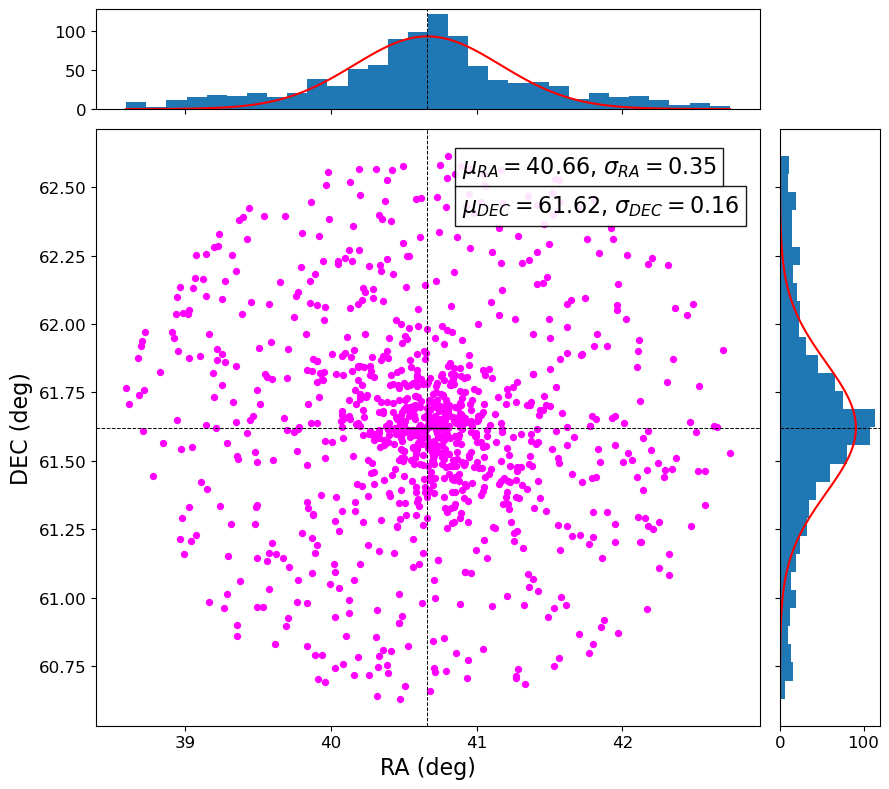

In [172]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(9,8),tight_layout=True)

ax.scatter(population["RAJ2000"],population["DEJ2000"],color = 'magenta', s=18)
ax.plot(params_ra[1], params_de[1], marker='+', color="k", markersize=30)
ax.axvline(params_ra[1],color='k',lw=0.7,ls='--')
ax.axhline(params_de[1],color='k',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.hist(pop_rad4["RAJ2000"], bins=30)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population["RAJ2000"], bins=30)
ax_histx.plot(x_ra,gaus1,color='r')
ax_histx.axvline(params_ra[1],color='k',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='k',lw=0.7,ls='--')
#ax_histx.plot(x_ra,gaus1,color='r',label=r"$\mu_1 = 225.98$, $\sigma_1= 0.0075$ ")
ax_histy.hist(population["DEJ2000"], bins=30, orientation='horizontal')
ax_histy.plot(gaus2,x_de,color='r')
#ax_histy.plot(gaus2,x_de,color='r',label=r"$\mu_2 = -54.35$, $\sigma_2= 0.0027$ ")
# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)
ax.text(40.9,62.55, r"$\mu_{RA} = 40.66$, $\sigma_{RA}= 0.35$", bbox={'facecolor':'white','alpha': 0.9, 'pad': 5},fontsize=16)
ax.text(40.9,62.41, r"$\mu_{DEC} = 61.62$, $\sigma_{DEC}= 0.16$", bbox={'facecolor':'white','alpha': 0.9, 'pad':5},fontsize=16)

### Proper Motion (pmRA,pmDE)

In [78]:
hist_pmra, bin_edges_pmra = np.histogram(population["pmRA"], bins=30)
hist_pmde, bin_edges_pmde = np.histogram(population["pmDE"], bins=30)

# take the centers of the bins 
bin_centers_pmra = (bin_edges_pmra[:-1] + bin_edges_pmra[1:]) / 2
bin_centers_pmde = (bin_edges_pmde[:-1] + bin_edges_pmde[1:]) / 2

# parameters
initial_guess_pmra = [1, np.mean(population["pmRA"]), np.std(population["pmRA"])]
initial_guess_pmde = [1, np.mean(population["pmDE"]), np.std(population["pmDE"])]

# adjust the gaussians
params_pmra, _ = curve_fit(gaussian, bin_centers_pmra, hist_pmra, p0=initial_guess_pmra)
params_pmde, _ = curve_fit(gaussian, bin_centers_pmde, hist_pmde, p0=initial_guess_pmde)

In [79]:
params_pmra

array([ 5.08623218, -1.77495118,  0.02430272])

In [80]:
params_pmde

array([6.66690887, 1.99721932, 0.03693528])

In [81]:
a1,mu1,sigma1= params_pmra[0], params_pmra[1], params_pmra[2]
a2,mu2,sigma2=  params_pmde[0], params_pmde[1], params_pmde[2]

x_pmra = np.linspace(min(population["pmRA"]), max(population["pmRA"]), 100)
x_pmde = np.linspace(min(population["pmDE"]), max(population["pmDE"]), 100)

gaus1=a1 * np.exp(-(x_pmra - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi))
gaus2=a2 * np.exp(-(x_pmde - mu2)**2 / (2 * sigma2*2)) / (sigma2 * np.sqrt(2 * np.pi))

Text(-1.7, 2.68, '$\\mu_{pmde} = \\ \\ \\ 1.99$, $\\sigma_{pmde}= 0.19$')

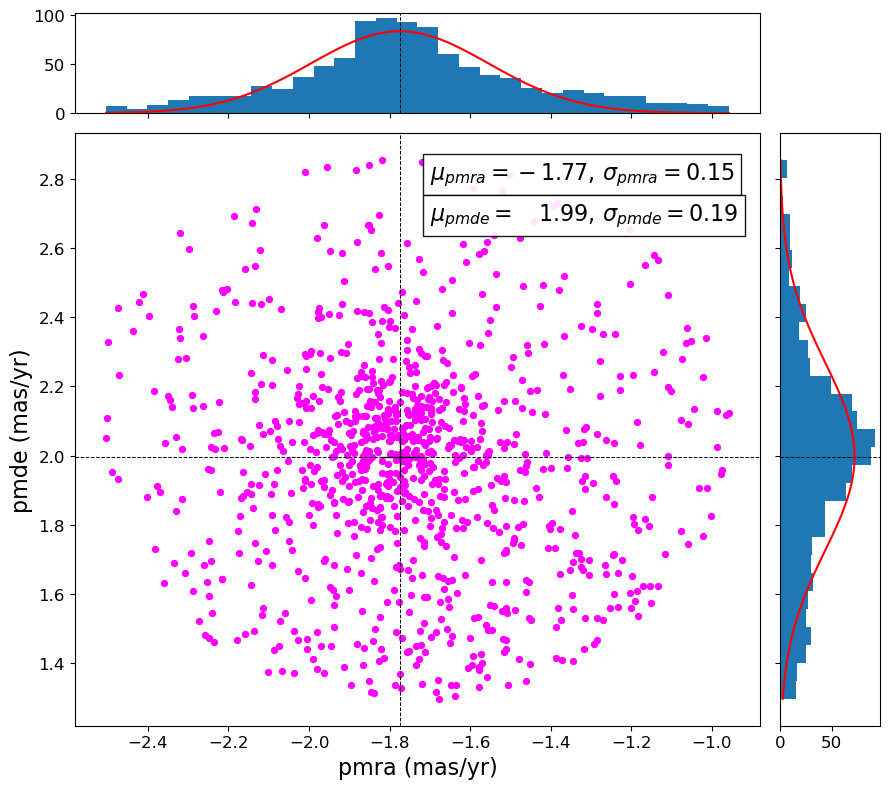

In [153]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(9,8),tight_layout=True)

ax.scatter(population["pmRA"],population["pmDE"],color = 'magenta', s=18)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="k", markersize=30)
ax.axvline(params_pmra[1],color='k',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='k',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.hist(population["RAJ2000"], bins=30)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population["pmRA"], bins=30)
ax_histx.plot(x_pmra,gaus1,color='r')
ax_histx.axvline(params_pmra[1],color='k',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='k',lw=0.7,ls='--')
#ax_histx.plot(x_pmra,gaus1,color='r',label=r"$\mu_1 = -7.47$, $\sigma_1= 0.017$ ")
ax_histy.hist(population["pmDE"], bins=30, orientation='horizontal')
ax_histy.plot(gaus2,x_pmde,color='r')
#ax_histy.plot(gaus2,x_pmde,color='r',label=r"$\mu_2 =  -5.50$, $\sigma_2= 0.019$ ")
# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)
ax.text(-1.7,2.8, r"$\mu_{pmra} = -1.77$, $\sigma_{pmra}= 0.15$", bbox={'facecolor':'white','alpha': 0.9, 'pad': 5},fontsize=16)
ax.text(-1.7,2.68, r"$\mu_{pmde} = \ \ \ 1.99$, $\sigma_{pmde}= 0.19$", bbox={'facecolor':'white','alpha': 0.9, 'pad':5},fontsize=16)

### Parallax (Plx)

We're using the paralax without correcion firstly.

In [175]:
hist_plx, bin_edges_plx = np.histogram(population["Plx"], bins=30)

# take the centers of the bins 
bin_centers_plx = (bin_edges_plx[:-1] + bin_edges_plx[1:]) / 2

# parameters
initial_guess_plx = [1, np.mean(population["Plx"]), np.std(population["Plx"])]

# adjust the gaussians
params_plx, _ = curve_fit(gaussian, bin_centers_plx, hist_plx, p0=initial_guess_plx)

In [176]:
params_plx

array([0.48567781, 0.87462998, 0.00398699])

In [177]:
a1,mu1,sigma1= params_plx[0], params_plx[1], params_plx[2]

x_plx = np.linspace(min(population["Plx"]), max(population["Plx"]), 100)

gaus1=a1 * np.exp(-(x_plx - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi))

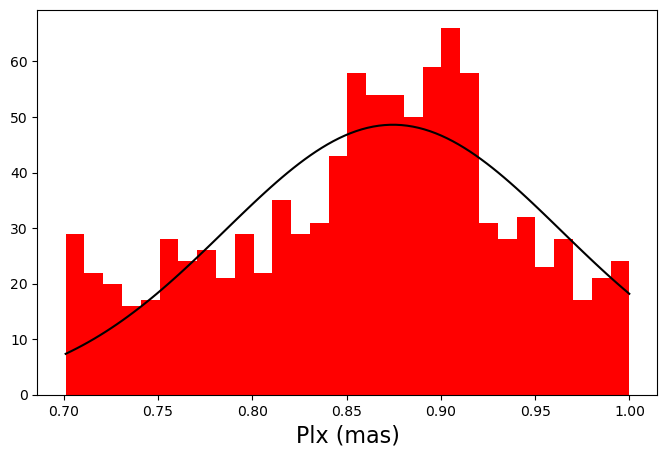

In [178]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population["Plx"],30, color="red")
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus1, 'k')
#ax.plot(x_plx, gaus1, 'k',label=r"$\mu_1 = 1.24$, $\sigma_1= 0.000992$ ")
#ax.axvline
#ax.axhline
#plt.gca().invert_xaxis()
#fig.legend(fontsize=13,bbox_to_anchor=(0.5, 0.88))
#plt.savefig("hist_Mvt.png", dpi=150)

## Standard deviation

- RA, DEC

In [40]:
params_ra

array([29.36903263, 40.66254591,  0.1258879 ])

In [47]:
dv_ra = np.sqrt(params_ra[2])
dv_ra 

0.35480684420043

In [41]:
params_de

array([6.48511601e+00, 6.16208964e+01, 2.84717918e-02])

In [48]:
dv_de = np.sqrt(params_de[2])
dv_de

0.16873586413649058

- pmRA, pmDE

In [42]:
params_pmra

array([ 5.08623218, -1.77495118,  0.02430272])

In [49]:
dv_pmra = np.sqrt(params_pmra[2])
dv_pmra

0.15589329150659068

In [43]:
params_pmde

array([6.66690887, 1.99721932, 0.03693528])

In [50]:
dv_pmde = np.sqrt(params_pmde[2])
dv_pmde

0.19218553702890484

- parallax

In [46]:
params_plx

array([0.48567781, 0.87462998, 0.00398699])

In [52]:
dv_plx = np.sqrt(params_plx[2])
dv_plx

0.06314258427533223